In [1]:
import torch
print(torch.__version__)

2.5.1+cu124


In [2]:
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.5.1+cu124.html

Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.5 MB/s eta 0:00:00


In [3]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00


In [5]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from torch_geometric.nn import Node2Vec
from sklearn.metrics import accuracy_score
from torch_geometric.datasets import Planetoid
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from node_embeddings import train

In [6]:
data = Planetoid('data', 'Cora')

Processing...
Done!


In [7]:
data[0]

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [8]:
dataset = data[0]

In [9]:
dataset.x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [12]:
labels = dataset.y.detach().cpu().numpy()
labels

array([3, 4, 4, ..., 3, 3, 3])

In [13]:
dataset.edge_index

tensor([[ 633, 1862, 2582,  ...,  598, 1473, 2706],
        [   0,    0,    0,  ..., 2707, 2707, 2707]])

In [15]:
model = Node2Vec(dataset.edge_index,
                 embedding_dim=50,
                 walk_length=30,
                 context_size=10,
                 walks_per_node=20,
                 num_negative_samples=1,
                 p=200, q=1, sparse=True)

In [16]:
model

Node2Vec(2708, 50)

In [17]:
train(model, epochs=10, batch_size=64, lr=0.001)

100%|██████████| 43/43 [00:22<00:00,  1.88it/s]


Epoch: 00, Loss: 5.5413


100%|██████████| 43/43 [00:21<00:00,  1.97it/s]


Epoch: 01, Loss: 5.1628


100%|██████████| 43/43 [00:24<00:00,  1.77it/s]


Epoch: 02, Loss: 4.8352


100%|██████████| 43/43 [00:22<00:00,  1.94it/s]


Epoch: 03, Loss: 4.5197


100%|██████████| 43/43 [00:22<00:00,  1.91it/s]


Epoch: 04, Loss: 4.2432


100%|██████████| 43/43 [00:22<00:00,  1.93it/s]


Epoch: 05, Loss: 3.9856


100%|██████████| 43/43 [00:22<00:00,  1.92it/s]


Epoch: 06, Loss: 3.7575


100%|██████████| 43/43 [00:20<00:00,  2.15it/s]


Epoch: 07, Loss: 3.5473


100%|██████████| 43/43 [00:23<00:00,  1.80it/s]


Epoch: 08, Loss: 3.3598


100%|██████████| 43/43 [00:18<00:00,  2.31it/s]

Epoch: 09, Loss: 3.1838


In [21]:
node_embeddings = model().detach().cpu().numpy()
node_embeddings

array([[-1.0964531 ,  0.31783682, -0.97122175, ..., -0.62804484,
         0.29188251, -0.21084741],
       [-0.75121087,  0.01389362, -0.08803646, ...,  0.23960327,
         0.15625396,  0.65357786],
       [-0.25659007,  0.24463321, -0.39822045, ...,  0.9270517 ,
         0.6160891 , -0.01459393],
       ...,
       [ 0.8468271 , -2.4153883 , -0.78875464, ..., -1.7786691 ,
         0.1953404 ,  0.24374142],
       [ 0.8805133 ,  1.6679722 ,  0.9566714 , ...,  0.39127147,
         2.2707982 ,  0.8291603 ],
       [ 0.73716444, -0.74907994, -0.92335725, ..., -0.66101795,
        -0.22351007,  0.6400545 ]], dtype=float32)

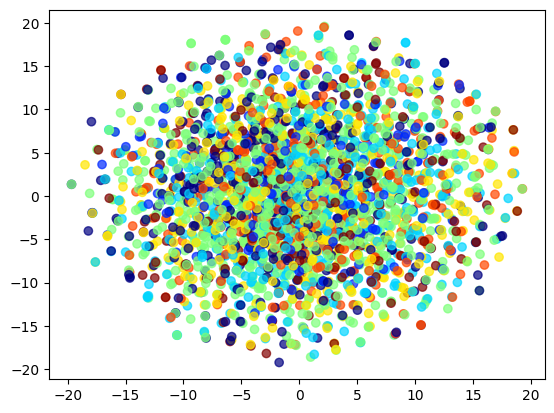

In [22]:
tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(node_embeddings)
plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1],
            c=labels, cmap='jet', alpha=0.7)

In [23]:
train_x, test_x, train_y, test_y = train_test_split(node_embeddings,
                                                    labels,
                                                    test_size=0.2,
                                                    stratify=labels)

In [24]:
random_forest = RandomForestClassifier()
random_forest.fit(train_x, train_y)

RandomForestClassifier()

In [26]:
preds = random_forest.predict(test_x)

In [27]:
accuracy_score(preds, test_y)

0.2988929889298893